# Model Optimization- Neural Network

Lets first see what parameters could possibly be tuned

In [28]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier()
params = clf.get_params()
print("There are %d parameters for the Logistic Model.  The Default values are:" %len(params.keys()))
for key in params.keys():
    print("%25s:   %s" %(key,params[key]))

There are 21 parameters for the Logistic Model.  The Default values are:
               activation:   relu
                    alpha:   0.0001
               batch_size:   auto
                   beta_1:   0.9
                   beta_2:   0.999
           early_stopping:   False
                  epsilon:   1e-08
       hidden_layer_sizes:   (100,)
            learning_rate:   constant
       learning_rate_init:   0.001
                 max_iter:   200
                 momentum:   0.9
       nesterovs_momentum:   True
                  power_t:   0.5
             random_state:   None
                  shuffle:   True
                   solver:   adam
                      tol:   0.0001
      validation_fraction:   0.1
                  verbose:   False
               warm_start:   False


In [29]:
# get the data 
import ml_utils as mu

with mu.HiddenPrints():
    X, y , Xh, yh, Xv, yv = mu.get_training_holdout_validation_data()

[2018-07-12 01:00:28.104419] Starting tuning classifier__hidden_layer_sizes
# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   12.6s finished


Best parameters set found on development set:

{'classifier__hidden_layer_sizes': (100, 100)}
[2018-07-12 01:00:41.857309] Done with tuning classifier__hidden_layer_sizes (Took 0.217 minutes)
[2018-07-12 01:00:41.857809] Starting tuning classifier__activation
# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   11.2s finished


Best parameters set found on development set:

{'classifier__activation': 'tanh'}


C:\Users\jtbricker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


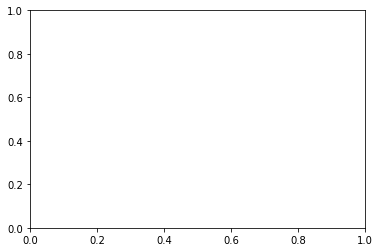

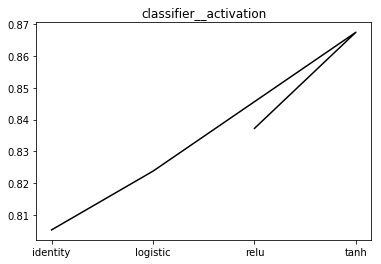

[2018-07-12 01:00:54.796481] Done with tuning classifier__activation (Took 0.200 minutes)
[2018-07-12 01:00:54.796481] Starting tuning classifier__solver
# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    8.7s finished


Best parameters set found on development set:

{'classifier__solver': 'adam'}


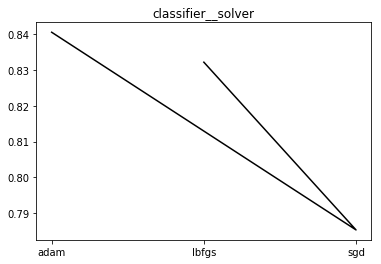

[2018-07-12 01:01:04.896064] Done with tuning classifier__solver (Took 0.167 minutes)
[2018-07-12 01:01:04.896064] Starting tuning classifier__alpha
# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:   34.5s finished


Best parameters set found on development set:

{'classifier__alpha': 0.6000000000000001}


C:\Users\jtbricker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


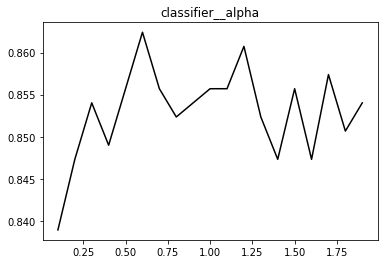

[2018-07-12 01:01:40.799361] Done with tuning classifier__alpha (Took 0.583 minutes)


In [38]:
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.neural_network import MLPClassifier

import numpy as np

# parameters and ranges to plot
param_grid = {
    "classifier__hidden_layer_sizes": [(100,100),(100,100,100),(100,100,100,100),(100,100,100,100,100)],
    "classifier__activation": ['identity', 'logistic', 'tanh', 'relu'],
    "classifier__solver": ['lbfgs', 'sgd', 'adam'],
    "classifier__alpha":[0.1*x for x in range(1,20)],
}

clf = Pipeline([
    ('standardization', StandardScaler()),
    ('oversampler', RandomOverSampler()),
    ('classifier', MLPClassifier(random_state = 84))
])

for parameter, param_range in dict.items(param_grid):
    with mu.Timer("tuning %s" %parameter) as timer:
        mu.unidirectional_grid_search_optimization(clf, parameter, param_range, X, y)